<a href="https://colab.research.google.com/github/subhayuroy/OpticalCharacterRecognition/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from scipy import ndimage
import numpy as np

###Opening and writing to image files


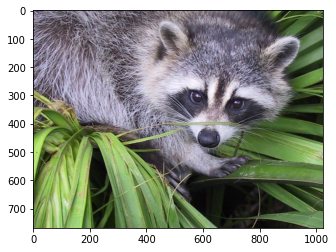

In [2]:
from scipy import misc
import imageio
f = misc.face()
imageio.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [3]:
from scipy import misc
import imageio
face = misc.face()
imageio.imsave('face.png', face) # First we need to create the PNG file

face = imageio.imread('face.png')
type(face)      

imageio.core.util.Array

In [4]:

face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [7]:
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

(2359296,)

In [8]:
face_from_raw.shape = (768, 1024, 3)

In [9]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))

In [10]:
for i in range(10):
    im = np.random.randint(0, 256, 10000).reshape((100, 100))
    imageio.imsave('random_%02d.png' % i, im)
from glob import glob
filelist = glob('random*.png')
filelist.sort()

###Displaying images


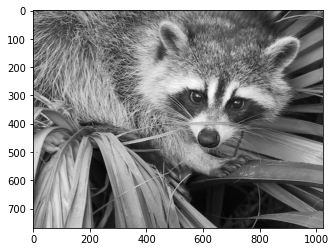

In [11]:
f = misc.face(gray=True)  # retrieve a grayscale image
import matplotlib.pyplot as plt
plt.imshow(f, cmap=plt.cm.gray) 

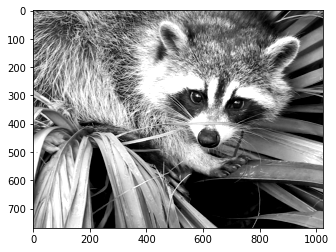

In [12]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)

(0.0, 1.0, 0.0, 1.0)

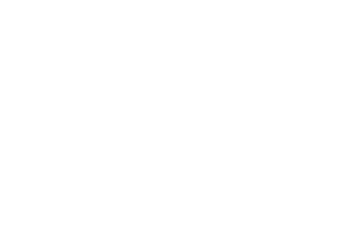

In [36]:
plt.axis('off')

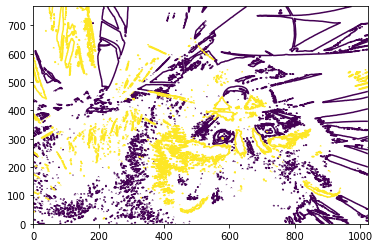

In [14]:
plt.contour(f, [50, 200]) 

###Basic manipulations


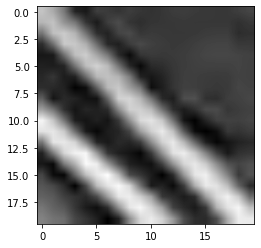

In [15]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear') 

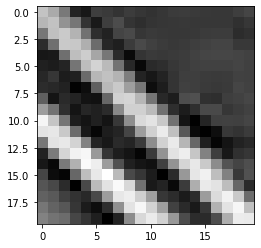

In [16]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest') 

In [18]:
face = misc.face(gray=True)
face[0, 40]

# Slicing
face[10:13, 20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

In [19]:
face[100:120] = 255

###Geometrical transformations


In [20]:
lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 25

In [22]:
face = misc.face(gray=True)
lx, ly = face.shape

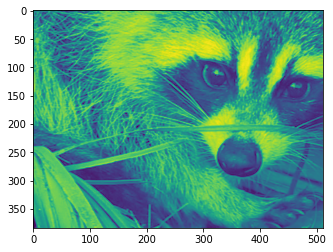

In [26]:
# Cropping
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
plt.imshow(crop_face)

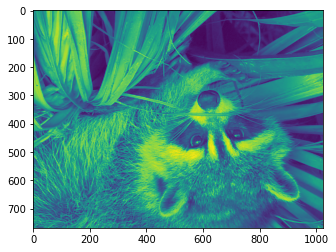

In [27]:
# up <-> down flip
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

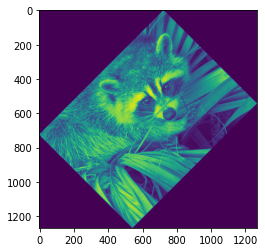

In [28]:
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.imshow(rotate_face)

###Blurring/smoothing


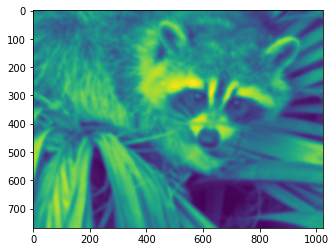

In [29]:
from scipy import misc
face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
plt.imshow(very_blurred)

###Sharpening


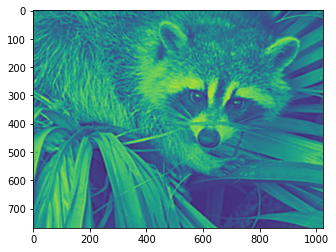

In [30]:
from scipy import misc
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
plt.imshow(sharpened)

###Segmentation


In [31]:
n = 10
l = 256
im = np.zeros((l, l))
np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

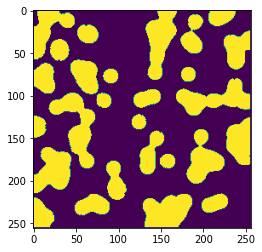

In [32]:
# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)
plt.imshow(close_img)

###Edge Detection using Canny Edge Detector

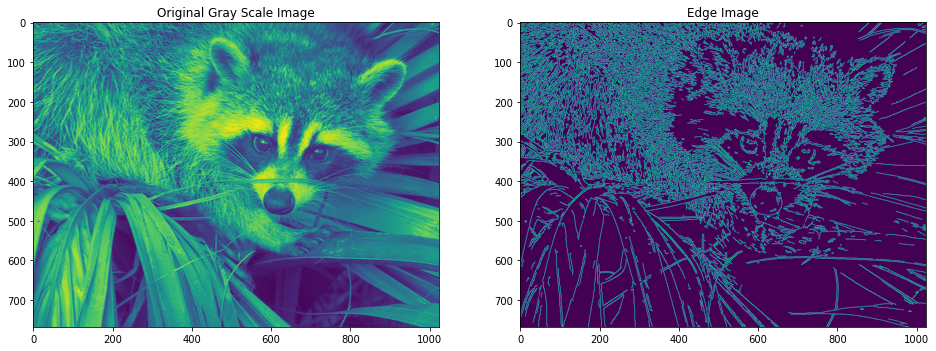

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 16))
img_gs = cv2.imread('face.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gs.jpg', img_gs)
edges = cv2.Canny(img_gs, 100,200)
plt.subplot(121), plt.imshow(img_gs)
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image')
plt.show()

###Measuring objects properties

In [37]:
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()

In [38]:
label_im, nb_labels = ndimage.label(mask)
nb_labels

26

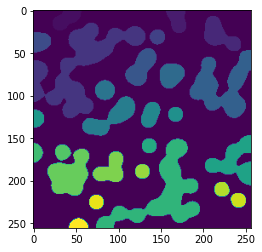

In [39]:
plt.imshow(label_im)